In [1]:
import pandas as pd

In [2]:
d = pd.read_csv("amazon.csv",encoding="iso-8859-1")

# To get top 5

In [3]:
d.head() # year = Year when Forest Fires happen
         # state = Brazilian State
         # month = Month when Forest Fires happen
         # number = Number of Forest Fires reported
         # date = Date when Forest Fires where reported

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# To get last 5

In [4]:
d.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# To get the infomation of all the attributes

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


# To get the no. of rows and columns

In [6]:
d.shape

(6454, 5)

# To get the missing value

In [8]:
d.isnull().sum() # There is no missing value in this dataset

year      0
state     0
month     0
number    0
date      0
dtype: int64

# Check for duplicate data in the dataset

In [9]:
duplicate_data = d.duplicated().any()
print(duplicate_data)

True


# If duplicate data is found than drop them

In [10]:
d = d.drop_duplicates()

In [11]:
d.shape

(6422, 5)

# Get how many duplicates values were there

In [12]:
6454 - 6422

32

# Rename the month name in English

In [13]:
d['month'].unique() # See, It's writen in some different language

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [14]:
d['month_name_in_eng'] = d['month'].map(
{
    'Janeiro':'January',
    'Fevereiro' : 'February',
    'Março' : 'March',
    'Abril' : 'April',
    'Maio' : 'May',
    'Junho' : 'June',
    'Julho' : 'July',
    'Agosto' : 'August' ,
    'Setembro' : 'September',
    'Outubro' : 'October',
    'Novembro' : 'November',
    'Dezembro' : 'December'
}
)

In [16]:
d.head()

,year,state,month,number,date,month_name_in_eng
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


# Get the number in which month maximum no. of forest fires reported 

In [17]:
max_fire_mon = d.groupby('month_name_in_eng')['number'].sum().reset_index()
max_fire_mon

,month_name_in_eng,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


In [18]:
import matplotlib.pyplot as mp
import seaborn as sb

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='month_name_in_eng', ylabel='number'>

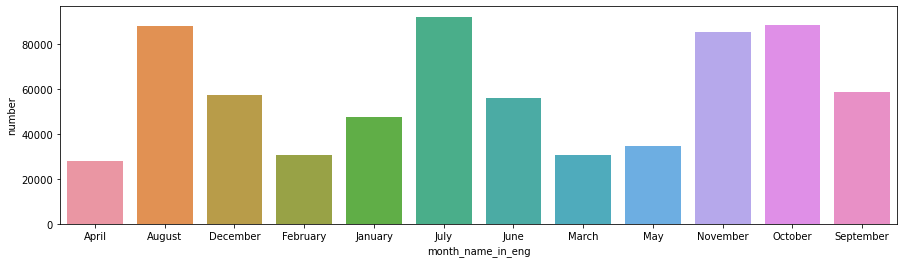

In [19]:
plt.figure(figsize=(15,4))
sb.barplot(x="month_name_in_eng",y="number", data=max_fire_mon)

# Now get in which year more of forest fire took place

In [21]:
max_fire_year = d.groupby('year')['number'].sum().reset_index()
max_fire_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='year', ylabel='number'>

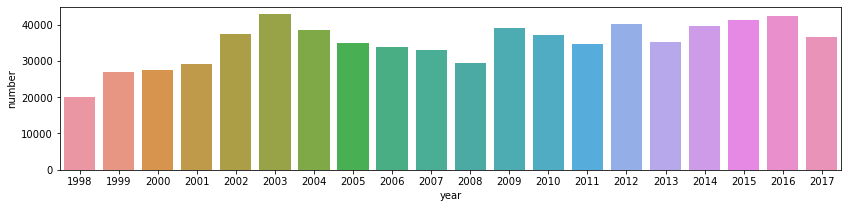

In [22]:
plt.figure(figsize=(14,3))
sb.barplot(x="year",y="number",data=max_fire_year)

# Now in which state maximum fire took place

In [23]:
max_fire_state = d.groupby('state')['number'].sum().reset_index()
max_fire_state

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

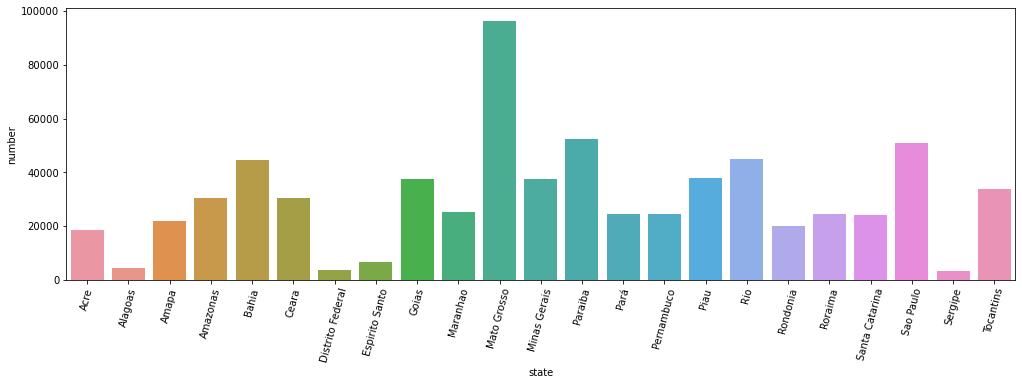

In [24]:
plt.figure(figsize=(17,5))
sb.barplot(x="state",y="number",data=max_fire_state)
plt.xticks(rotation=75)
plt.show()

# Get the total no. of fire took place in Amazon

In [28]:
d["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [29]:
d[d['state'] == "Amazonas"]['number'].sum()

30650.129

# Get the no. of total fire in Amazonas year wise

In [36]:
d1 = d[d['state'] == "Amazonas"]
d2 = d1.groupby('year')['number'].sum().reset_index()
d2

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='year', ylabel='number'>

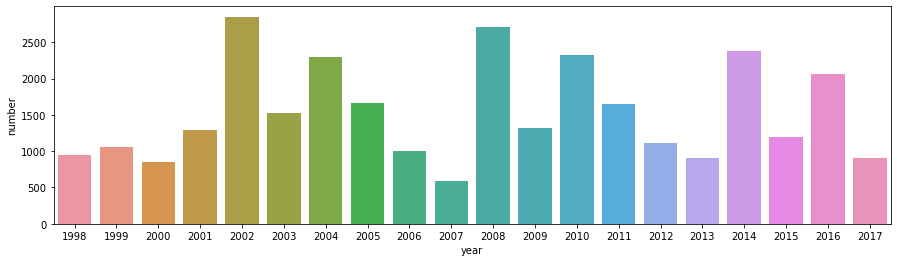

In [37]:
plt.figure(figsize=(15,4))
sb.barplot(x="year",y="number",data=d2)

In [ ]:
Get the total no. of fire took place in

In [39]:
d["year"].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [47]:
d3 = d[d['year'] == 2017]
d4 = d3.groupby('month')['number'].sum().reset_index()
d4

,month,number
0,Abril,1559.000
1,Agosto,4120.410
2,Fevereiro,1400.000
3,Janeiro,2342.000
4,Julho,5929.998
5,Junho,4148.361
6,Maio,2506.000
7,Março,2017.000
8,Novembro,6217.379
9,Outubro,3600.159


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='month', ylabel='number'>

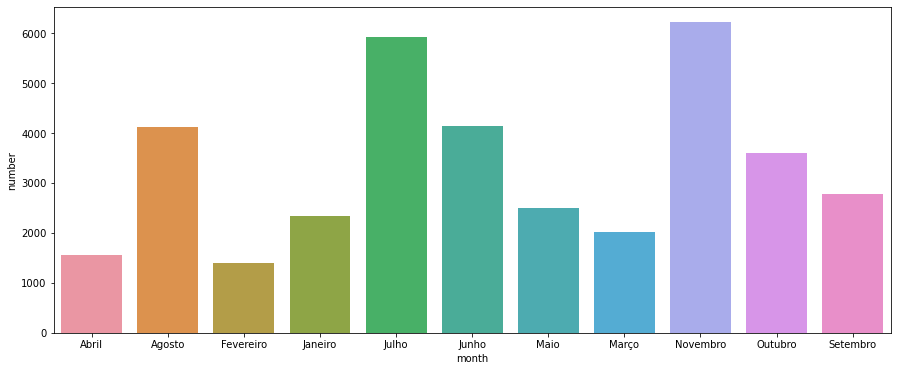

In [48]:
plt.figure(figsize=(15,6))
sb.barplot(x="month", y="number",data=d4)